In [1]:
import distribution_test as dt
import numpy as np
import pandas as pd

In [2]:
with open('../../postprocessing/representation.npy', 'rb') as f:
    rep = np.load(f)
    
df = pd.read_csv('../../dataset/m_test.csv')
print(df.columns.values)

['object_id' 'photoz' 'petroR90_r' 'r_cmodel_mag_ge' 'g_cmodel_mag_ge'
 'i_cmodel_mag_ge' 'z_cmodel_mag_ge' 'image_path' 'petro_half_light'
 'petro_90_light' 'dataset' 'snapshot_id' 'subhalo_id'
 'root_descendant_id' 'lookback' 'z' 'stellar_age_2rhalf_lumw'
 'fraction_disk_stars' 'stellar_mass' 'mass_in_rad' 'mass_exsitu'
 'half_mass_rad_physical' 'snap_num_last_maj_merger'
 'mass_last_maj_merger' 'mean_merger_lookback_time'
 'mean_merger_mass_ratio' 'color' 'i_band_mag_dust_apparent' 'mass'
 'lookback_time_last_maj_merger' 'exsitu']


In [3]:
mask_HSC = df['dataset'] == 'HSC'
mask_TNG100 = df['dataset'] == 'HSC_TNG100'

rep_HSC, rep_TNG100 = dt.DistributionTest.reshape_input(rep[mask_HSC], rep[mask_TNG100])

In [4]:
mndd = dt.MeanNeighborDistanceDeviation(rep_HSC)
deviations = mndd.get_deviations(rep_TNG100)

#mndd = dt.MeanNeighborDistance(rep_HSC, p=1)
#deviations = mndd.get_normalized_neighbor_distances(rep_TNG100)

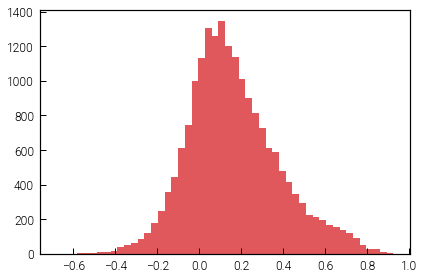

In [5]:
import matplotlib.pyplot as plt

abs_deviations = np.abs(deviations)

plt.hist(deviations, bins=50)
plt.show()

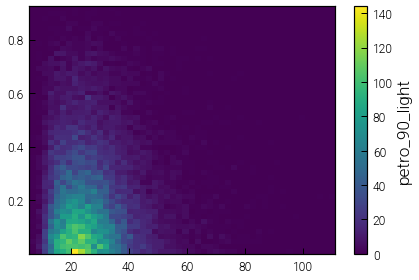

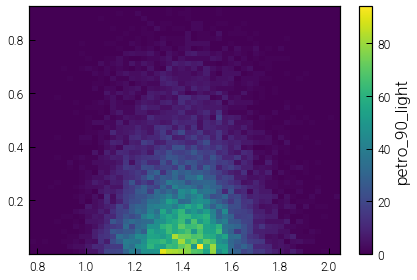

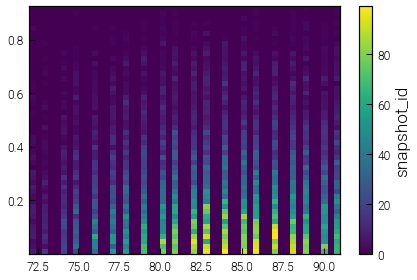

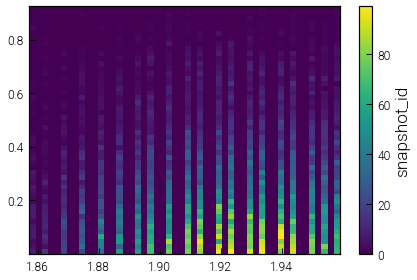

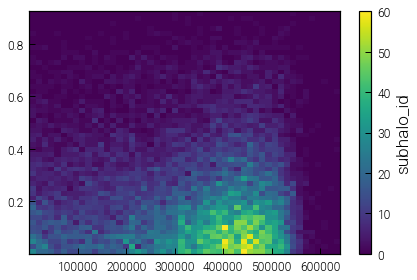

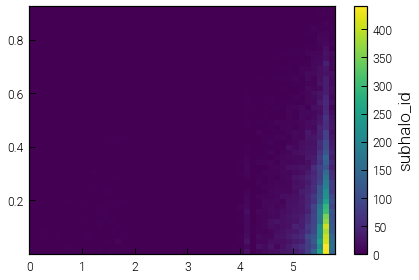

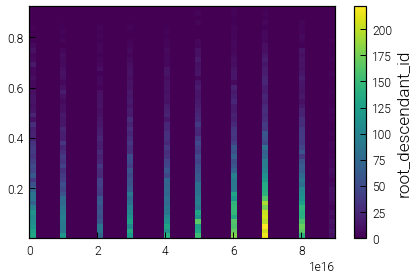

/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


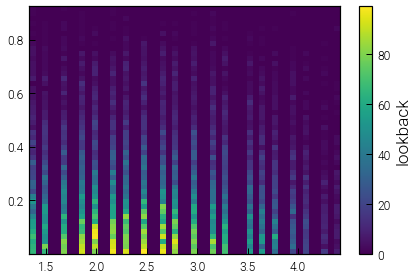

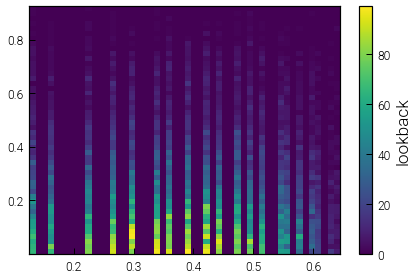

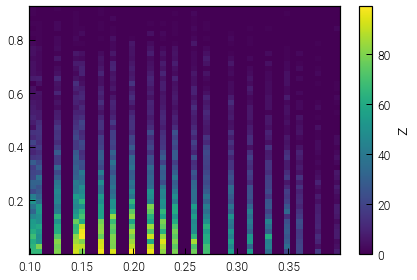

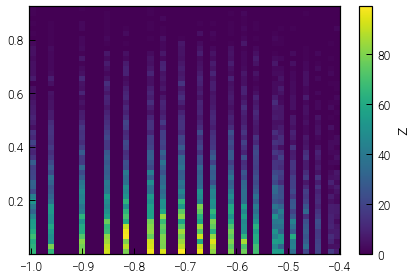

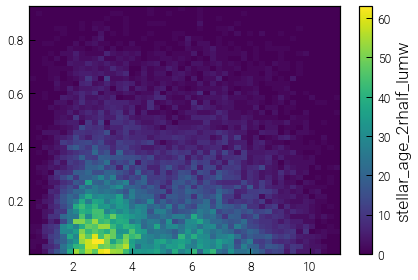

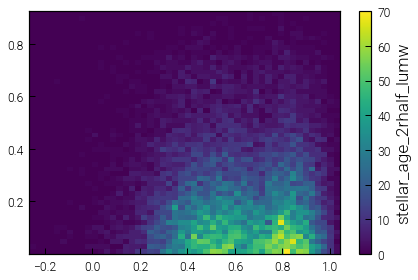

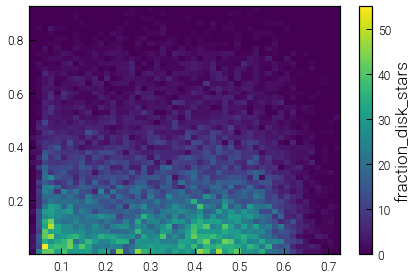

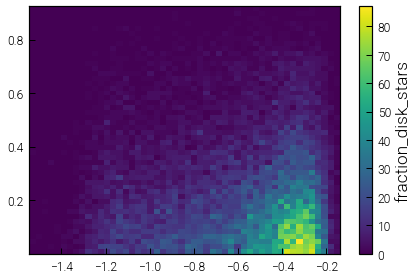

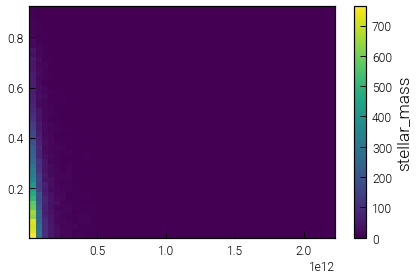

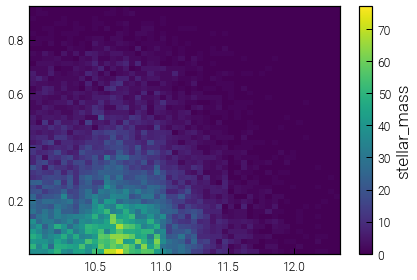

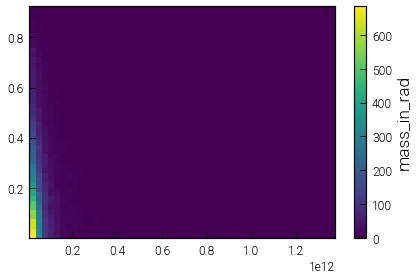

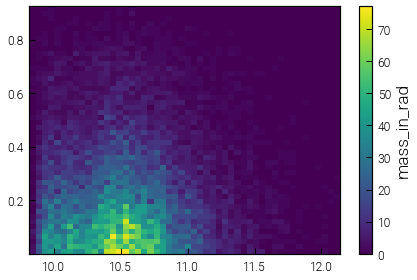

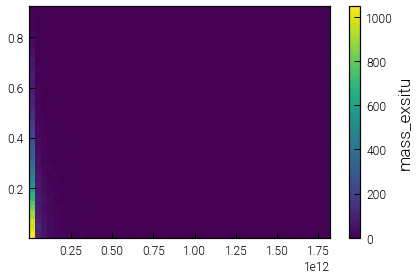

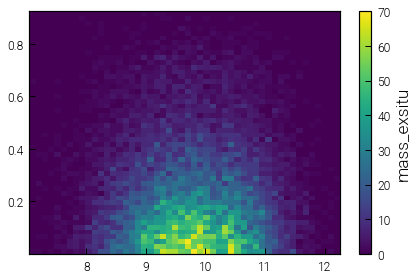

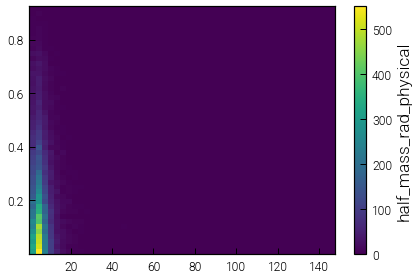

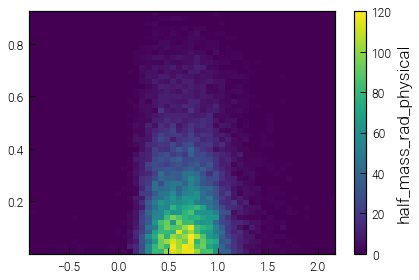

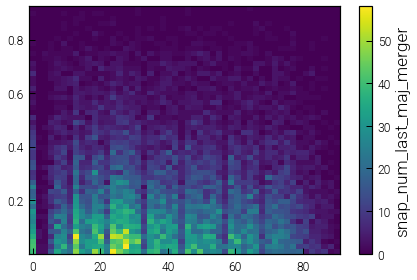

/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


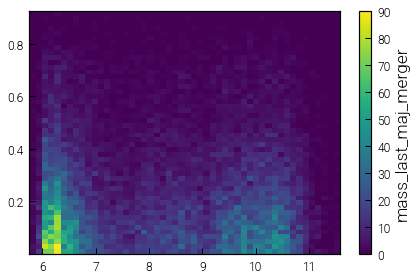

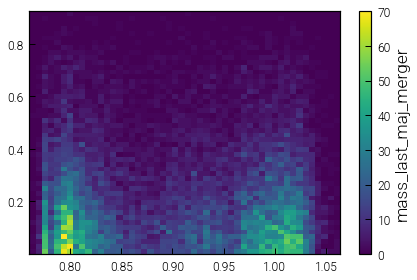

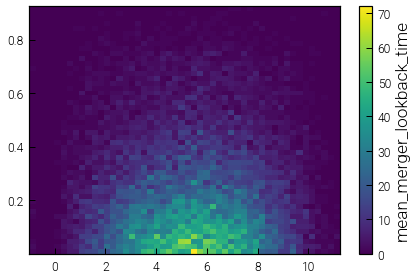

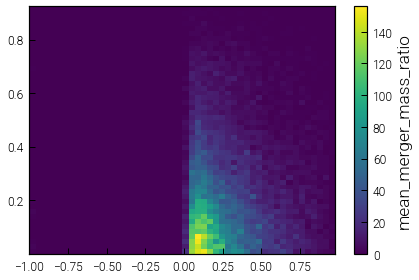

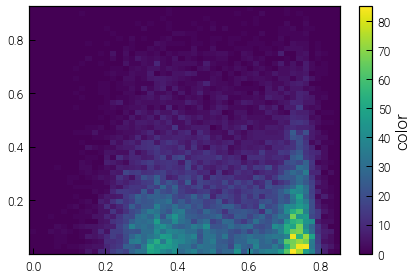

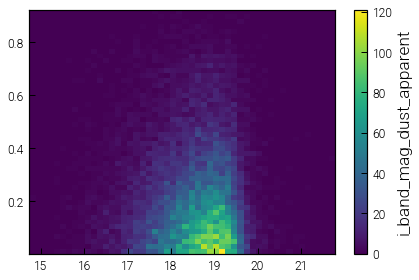

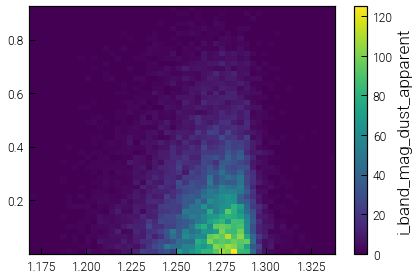

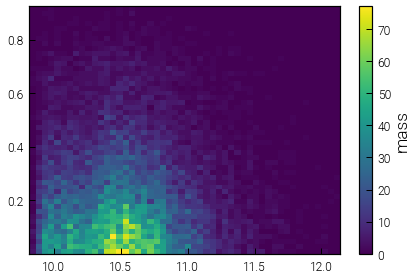

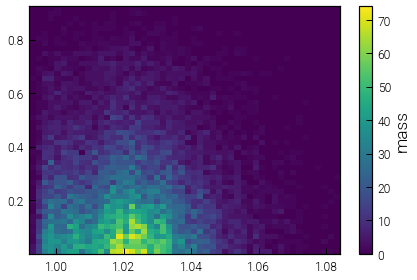

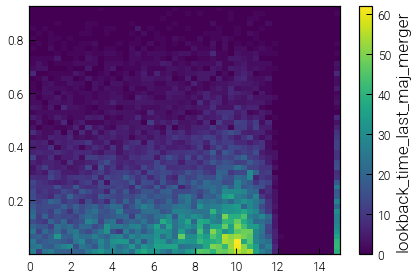

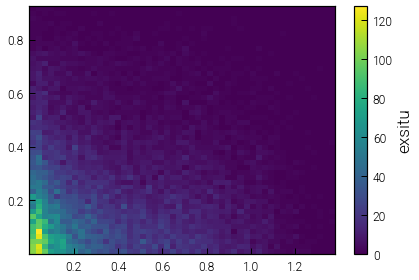

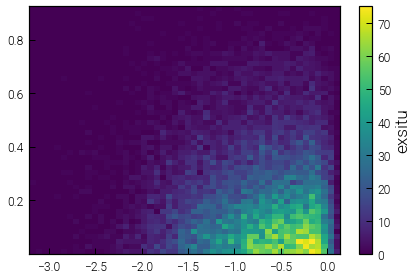

In [6]:
for label in df.columns.values:
    try:
        plt.hist2d(df[label][mask_TNG100], abs_deviations, bins=50)
        plt.colorbar(label=label)
        plt.show()
        
        plt.hist2d(np.log10(df[label][mask_TNG100]), abs_deviations, bins=50)
        plt.colorbar(label=label)
        plt.show()
        
    except:
        pass

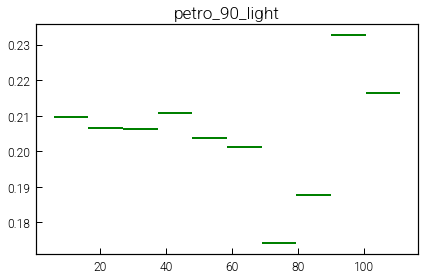

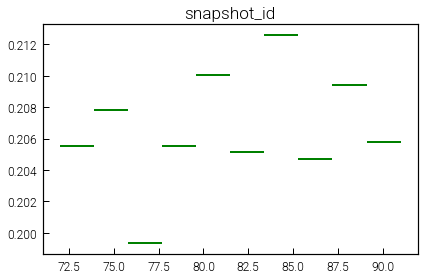

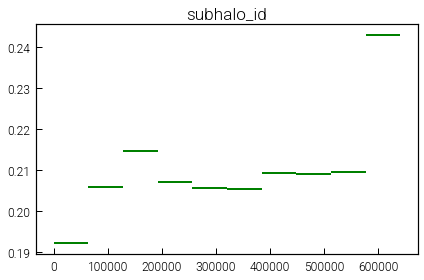

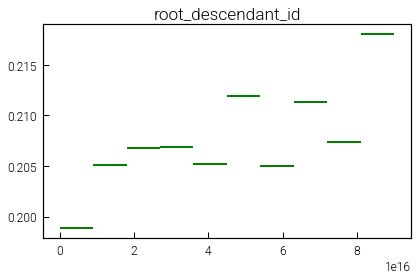

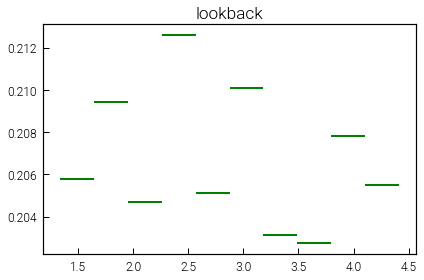

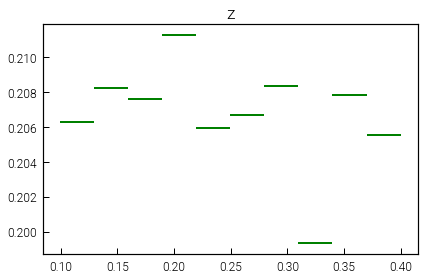

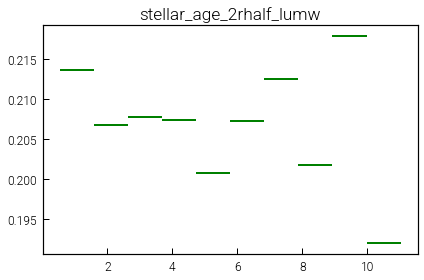

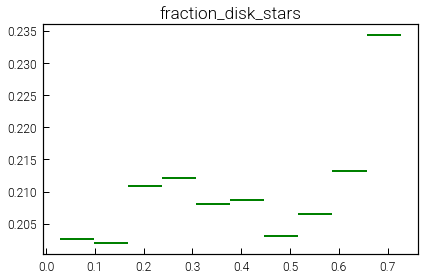

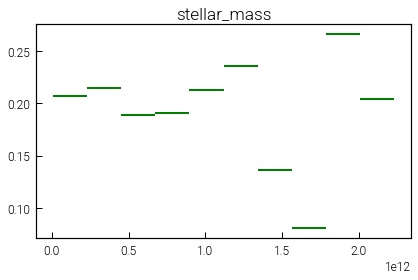

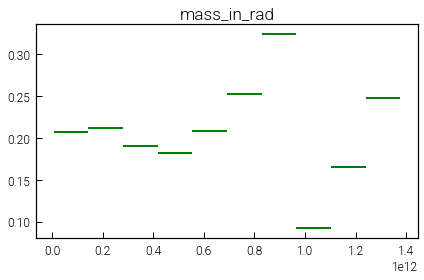

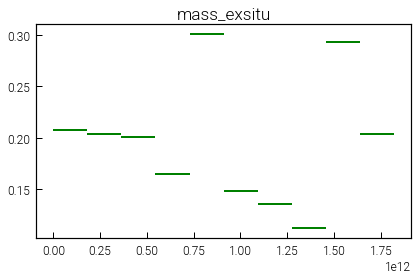

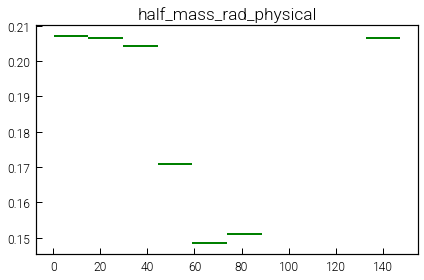

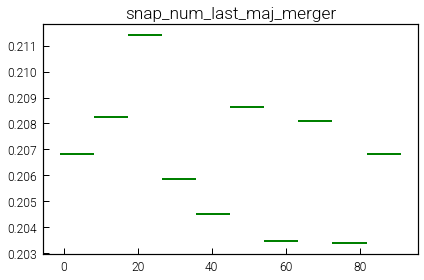

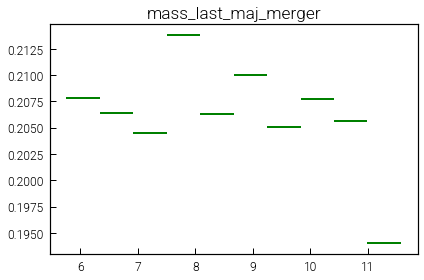

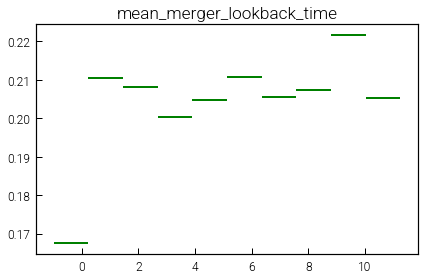

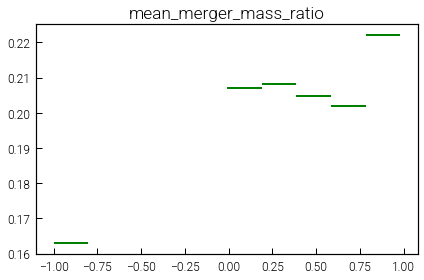

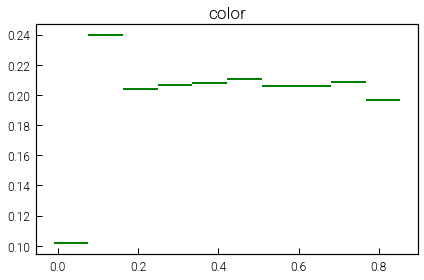

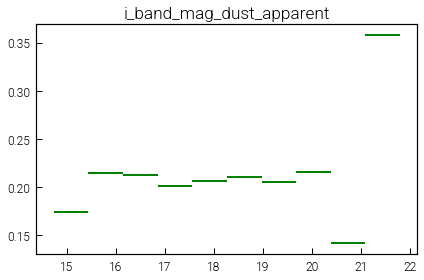

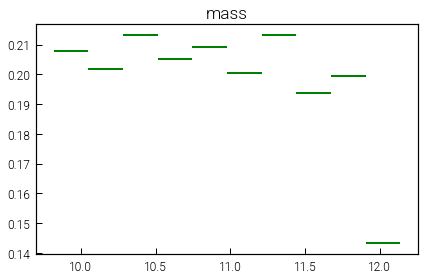

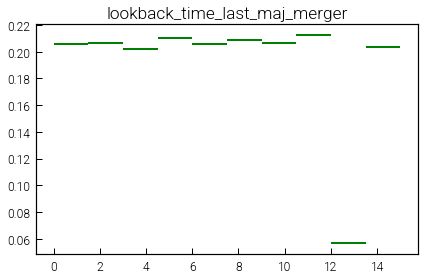

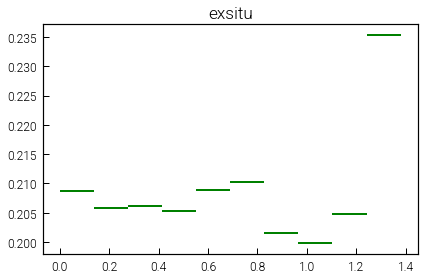

In [7]:
from scipy import stats

for label in df.columns.values:
    try:
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(df[label][mask_TNG100], abs_deviations, statistic='mean', bins=10)
        
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.title(label)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='g', lw=2)
        #plt.ylim(0,0.4)
        plt.show()
        
    except:
        pass

In [8]:
#pt = dt.PermutationTest(rep_HSC, rep_TNG100, dt.MeanNeighborDistanceDeviation)
#pt(10000,10)

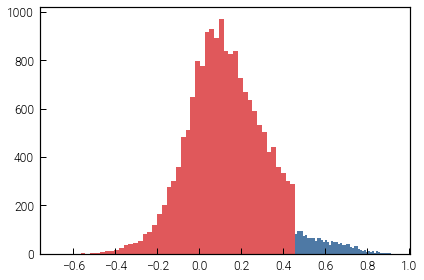

In [9]:
quantile = np.quantile(deviations, 0.9)
mask = deviations > quantile

plt.hist(deviations[~mask], bins=50)
plt.hist(deviations[mask], bins=50)
plt.show()

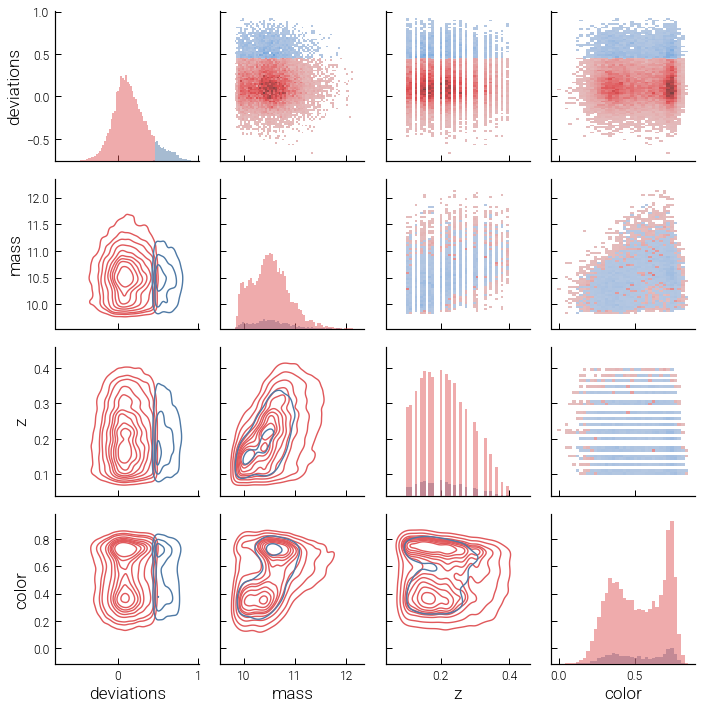

In [10]:
import seaborn as sns
d = {'high_deviation': mask, 'deviations': deviations, 'mass': df['mass'][mask_TNG100], 'z': df['z'][mask_TNG100], 'color': df['color'][mask_TNG100]}
g = sns.PairGrid(pd.DataFrame(d), hue="high_deviation")
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.map_upper(sns.histplot)